In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/HP/Desktop/Social_Network_Ads.csv")

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)


In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [8]:
x = df[["User ID","Gender","Age", "EstimatedSalary"]]
y = df["Purchased"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
model = LogisticRegression()

In [11]:
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(x_test)

In [13]:
cm = confusion_matrix(y_test, y_pred) 
disp=ConfusionMatrixDisplay (confusion_matrix=cm)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[60  3]
 [22 15]]


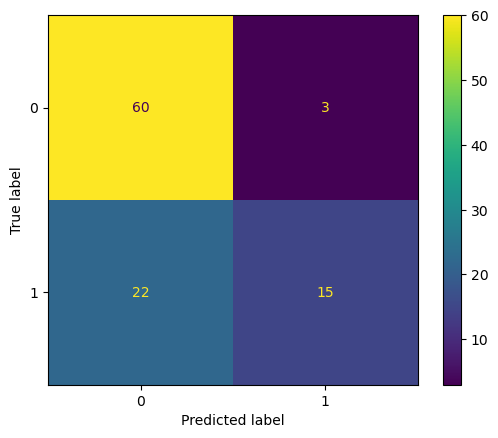

In [14]:
disp.plot()
plt.show()

In [15]:
def get_confusion_matrix_values (y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0] [1], cm[1][0], cm[1][1])

TP, FP, FN, TN = get_confusion_matrix_values (y_test, y_pred)
print("TP: ", TP)
print("FP: ", FP)
print("FN: ", FN)
print("TN: ", TN)

TP:  60
FP:  3
FN:  22
TN:  15


In [16]:
print("The Accuracy is ", (TP+TN)/(TP+TN+FP+FN))
print("The precision is ", TP/(TP+FP))
print("Error Rate:", 1-(TP+TN)/(TP+TN+FP+FN))
print("The recall is ", TP/(TP+FN))

The Accuracy is  0.75
The precision is  0.9523809523809523
Error Rate: 0.25
The recall is  0.7317073170731707
